[![Open In Wolfram Cloud](https://raw.githubusercontent.com/dmse-mit/3029/main/files/wolfram-badge.svg)](https://www.wolframcloud.com/obj/gvarnavi/Published/3029-SP22__L01__classical-mechanics-intro__01-31-22.nb)

# Classical Mechanics

Why revisit classical mechanics computationally?
>Undergraduate [physics] students come in expecting that the hardest thing they'll have to learn will be relativity or quantum mechanics.
Actually those are the most novel topics. The hardest thing that an undergraduate physics student must learn is the classical dynamics of spinning tops

### Fueling your scientific curiosity
- Why does dry spaghetti (almost) always break in 3 pieces?  
![dry spaghetti](https://qph.fs.quoracdn.net/main-qimg-c93a5371ab853afa4ab13df826b48cea-pjlq)

- How do 'tears of wine' form?  
![tears of wine](https://steemitimages.com/0x0/https://media.giphy.com/media/shrcRCCTV6ATu/giphy-downsized.gif)

- How does a tippe top invert itself?  
![tippe top](https://nimax-img.de/Produktbilder/normal/60900_2/AstroMedia-Tippe-Top.jpg)


(one of) 3.029's class objectives:
>The hope is, next time you watch a YouTube video about a curious scientific phenomenon, 
or step outside and wonder why ice squeaks underneath your boot, or why icicles form periodic ripples, 
you'll reach for a notebook (the modern analog for the back of an envelope?) and have fun trying to work it out! 

## Pendulum Waves

This is a mesmerizing video demonstration of 15 uncoupled pendula:  
https://www.youtube.com/watch?v=yVkdfJ9PkRQ

Let's start by modeling a single pendulum:  
![simple pendulum](https://upload.wikimedia.org/wikipedia/commons/b/b2/Simple_gravity_pendulum.svg)

The equation of motion for a pendulum is given by (we'll derive this later this week):  

$$
\theta''(t) = -\frac{g}{L}\sin(\theta(t))
$$

### Small-angle Approximation

To solve this analytically, you probably made the "small amplitude" approximation 8.01.

For small amplitudes of $\theta$, we may replace $\sin(\theta(t))\rightarrow \theta(t)$

Sqrt[g] t             Sqrt[g] t
C[1] Cos[---------] + C[2] Sin[---------]
          Sqrt[L]               Sqrt[L]
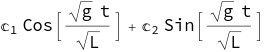

In [1]:
DSolveValue[\[Theta]''[t] + g/L \[Theta][t] == 0, \[Theta][t], t]

This is a 2^nd order ODE.  
We therefore need 2 initial conditions to specify the two constants above.  
We'll set the initial displacement at a symbolic value $\theta(0) \rightarrow \theta_0$  
and the initial velocity to zero $\theta'(0)\rightarrow 0$.

Sqrt[g] t
θ0 Cos[---------]
        Sqrt[L]
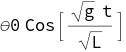

In [2]:
smallDisplacementSymbolicSolution[\[Theta]0_, g_, L_][t_] = 
 DSolveValue[{\[Theta]''[t] + g/L \[Theta][t] == 0, \[Theta][0] == \[Theta]0, \[Theta]'[0] == 0}, \[Theta][t], t]

**Coding comment:** We used the pattern `function[paramA_,paramB_][argument_] = ...`

Will use this pattern frequently, as it achieves two convenient tasks:
1. Separates arguments and parameters, so we can use forms like:  
	`function[paramA,paramB]/@listOfArguments`
2. Provides a convenient way of assigning symbols to expressions, as opposed to something like:  
	`expressionRHS /.{paramA->.., paramB->..}`

The solution is a simple sinusoidal term with a natural frequency $\omega=\sqrt{g/L}$

Let's plot one such pendulum for $g=1$, $L=1$, $\theta_0 = \pi/12$:

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
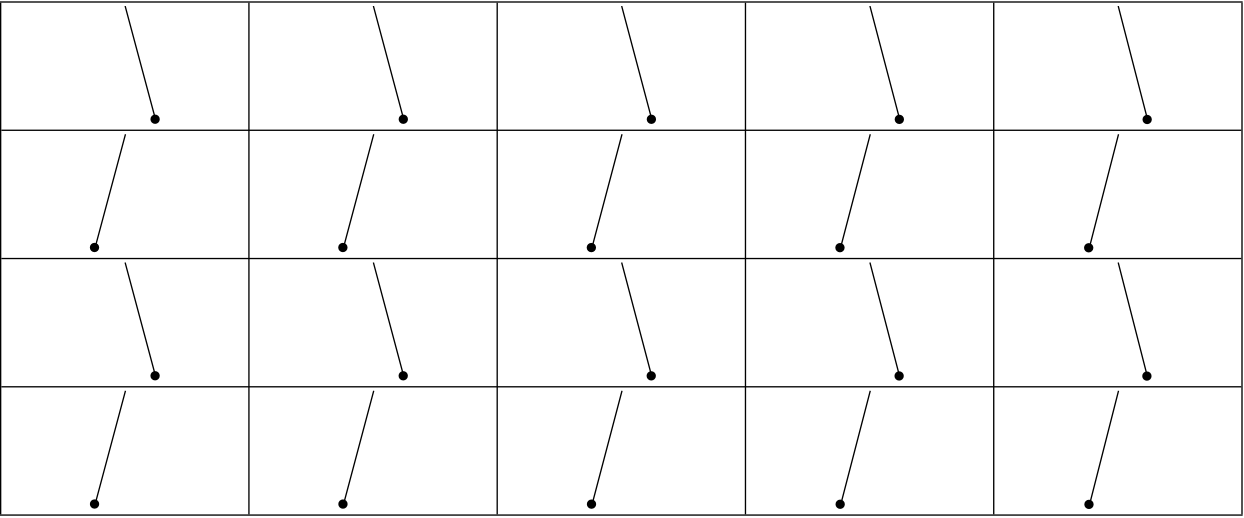

In [3]:
visualizePendulum[length_, color_: Black][angle_] := Graphics[{
   {color, Line[{{0, 0}, length {Sin[angle], -Cos[angle]}}]},
   {color, PointSize[Large], Point[length {Sin[angle], -Cos[angle]}]}
   }, PlotRange -> 1.025 {{-1, 1}, {-1, 0}}]
   
With[{g = 1, \[Theta]0 = \[Pi]/12, L = 1}, 
 Multicolumn[Table[
    visualizePendulum[L][smallDisplacementSymbolicSolution[\[Theta]0, g, L][t]],
    {t,Subdivide[0, 60, 19]}], 5, Appearance -> Horizontal,Frame -> All]
 ]

It is now straight-forward to add multiple pendula with different lengths:


-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
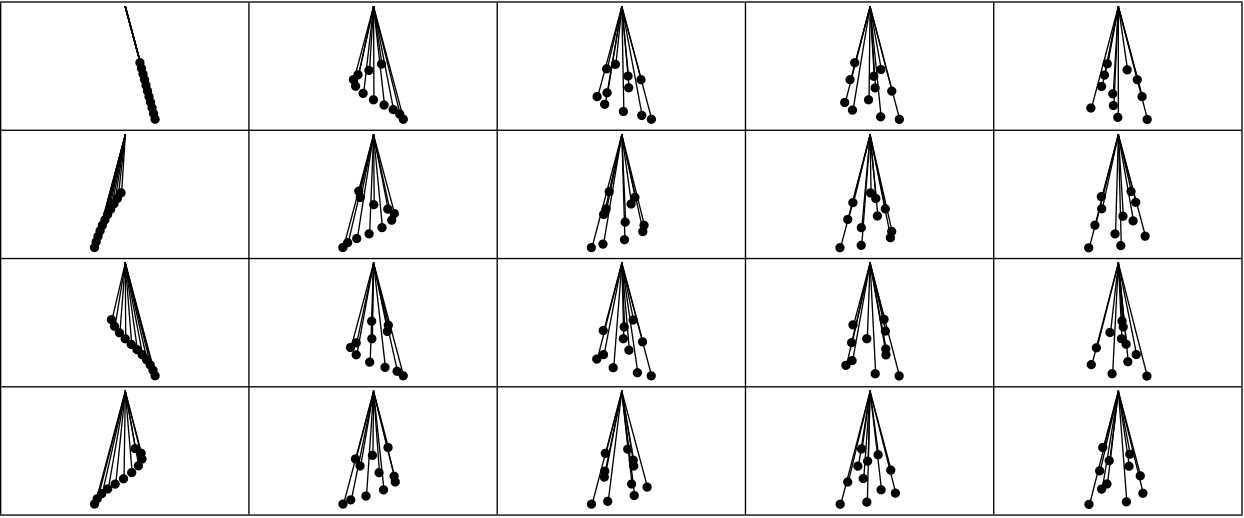

In [6]:
With[{g = 1, \[Theta]0 = \[Pi]/12}, 
 Multicolumn[Table[Show[
    Table[visualizePendulum[length][smallDisplacementSymbolicSolution[\[Theta]0, g, length][t]],
    {length, Subdivide[1/2, 1, 10]}]], {t,Subdivide[0, 60, 19]}],
    5, Appearance -> Horizontal,Frame -> All]]

This is already very close to the YouTube video!  
Note we chose 15 evenly spaced lengths b/w $L=[0.5,1]$  

These all swing at different frequencies and thus take different times to complete one full cycle. We want to choose our lengths in such a way that all the pendula end up at their starting position after 60 seconds.

To do this, note that the period of oscillations is related to the natural frequency (and thus the length) using:

$$
T = \frac{2\pi}{\omega} = 2\pi \sqrt{\frac{L}{g}}=f^{-1}
$$

If we want the longest pendulum to perform 10 oscillations/cycle and the shortest pendulum to perform 25 oscillations/cycle we can write a simple function to compute the desired lengths.

In [7]:
simplePendulumLength[g_, {n_, minOscillations_, maxOscillations_}][index_] := 
 With[{step = (maxOscillations - minOscillations)/n},
  g/((2 \[Pi])^2 ((minOscillations + step index)/60)^2) ]
  
N[simplePendulumLength[1, {15, 10, 25}] /@ Range[15]]

{0.753629, 0.633257, 0.53958, 0.46525, 0.405285, 0.356207, 0.315533, 0.281448, 0.252601, 
 
>   0.227973, 0.206778, 0.188407, 0.17238, 0.158314, 0.145903}

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
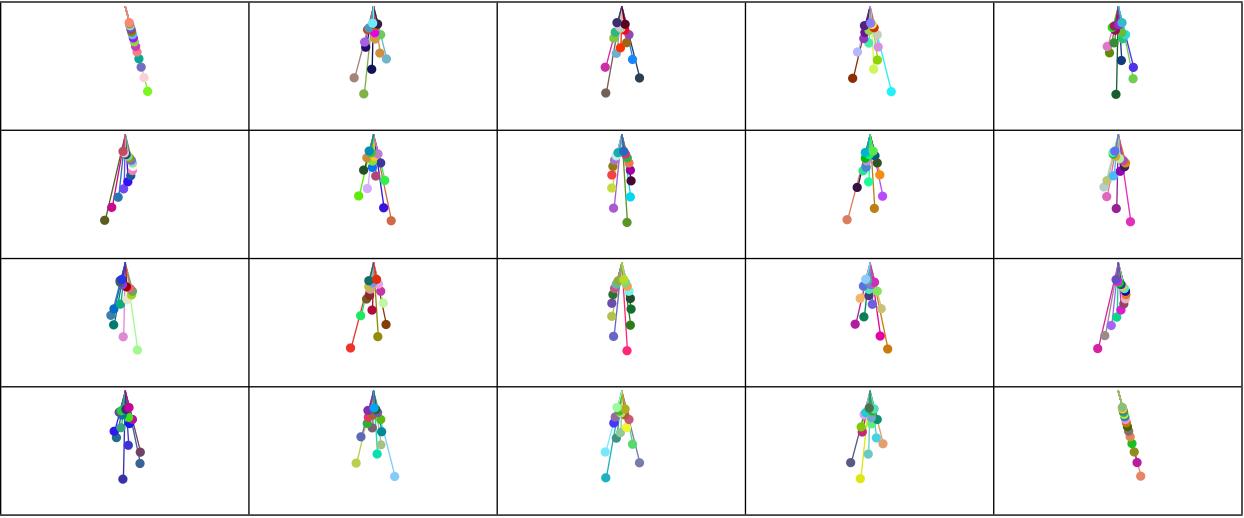

In [10]:
With[{g = 1, \[Theta]0 = \[Pi]/12,lengths = simplePendulumLength[1, {15, 10, 25}] /@ Range[15]}, 
 Multicolumn[Table[Show[
   Table[visualizePendulum[length,RandomColor[]][smallDisplacementSymbolicSolution[\[Theta]0, g, length][t]],
   {length, lengths}]], {t,Subdivide[0, 60, 19]}],
   5, Appearance -> Horizontal,Frame -> All]]

### Large Amplitudes

For larger initial amplitudes, our approximation fails and we must instead solve the equation numerically.  
We will use `ParametricNDSolve` to keep the initial amplitude $\theta_0$ as a parameter

ParametricFunction[<>]
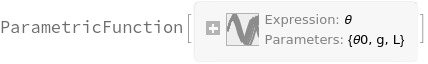

In [11]:
parametricNumericSolution = ParametricNDSolveValue[{\[Theta]''[t] + g/L Sin[\[Theta][t]] == 0, 
 \[Theta][0] == \[Theta]0, \[Theta]'[0] == 0}, \[Theta], {t, 0, 60}, {\[Theta]0, g, L}]

Let's compare our "true" numerical solution with our analytical approximation:

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
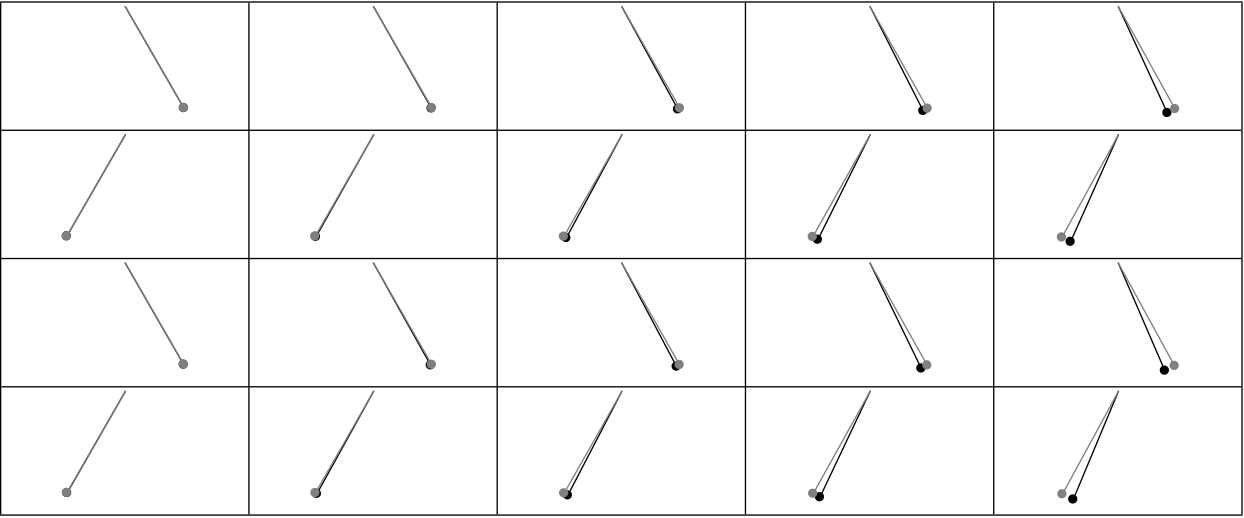

In [12]:
With[{g = 1, \[Theta]0 = \[Pi]/6, L = 1}, 
 Multicolumn[Table[Show[
  {visualizePendulum[L, Black][parametricNumericSolution[\[Theta]0, g, L][t]],
  visualizePendulum[L,Gray][smallDisplacementSymbolicSolution[\[Theta]0, g, L][t]]}],
  {t, Subdivide[0, 60, 19]}], 5, Appearance -> Horizontal, Frame -> All]]

And plot our 15 pendula:

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
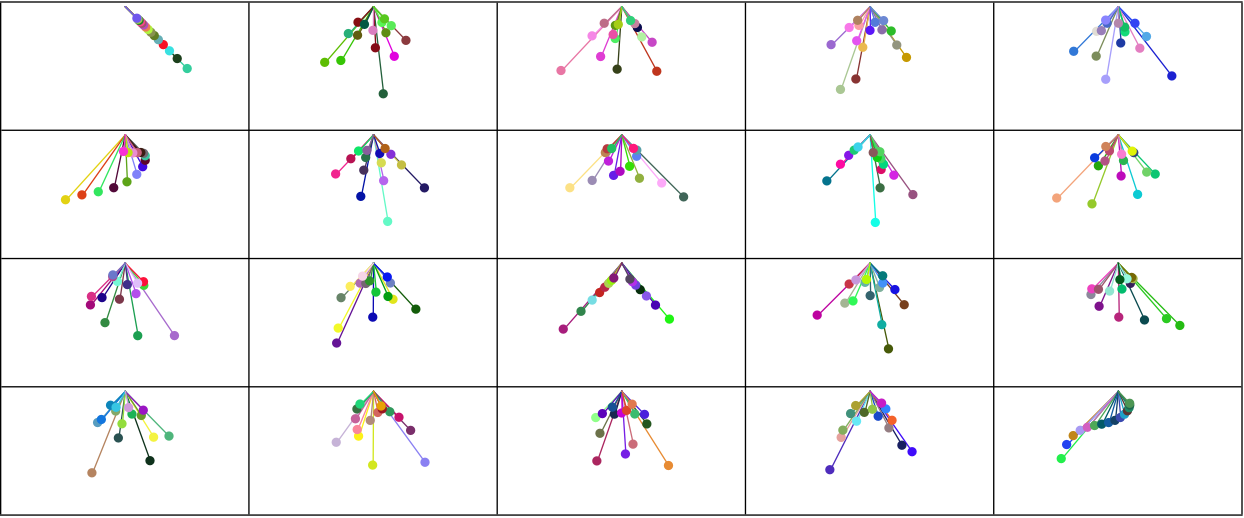

In [13]:
With[{g = 1, \[Theta]0 = \[Pi]/4,lengths = simplePendulumLength[1, {15, 10, 25}] /@ Range[15]}, 
 Multicolumn[Table[Show[
    Table[visualizePendulum[length,RandomColor[]][parametricNumericSolution[\[Theta]0, g, length][t]],
    {length, lengths}]], {t, Subdivide[0, 60, 19]}], 5, Appearance -> Horizontal,Frame -> All]]

The lengths we used however, were for the simple pendulum.  
There's no-longer a closed-form solution for the pendulum period. We will extract it numerically. To do so, we use a nifty trick by storing the values the pendulum crosses the vertical orientation, while swinging counter-clockwise. This is done using the instruction `WhenEvent`

ParametricFunction[<>]
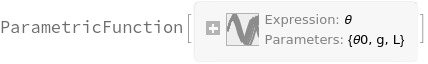

In [14]:
parametricNumericSolutionPlusPeriod = ParametricNDSolveValue[{\[Theta]''[t] + g/L Sin[\[Theta][t]] == 0, 
  \[Theta][0] == \[Theta]0, \[Theta]'[0] == 0, 
   WhenEvent[\[Theta][t] == 0 && \[Theta]'[t] > 0, Sow[t]]},
   \[Theta], {t, 0, 60}, {\[Theta]0, g, L}, Method -> {"ParametricCaching" -> None}]

Notice that when we evaluate it as normal, it returns the solution as before

InterpolatingFunction[{{0., 60.}}, <>]
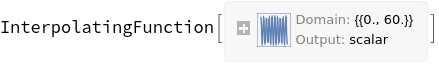

In [15]:
parametricNumericSolutionPlusPeriod[\[Pi]/12, 1, 1]

If we Reap the Sown results however, we can extract the period by the difference of successive crossings:

{InterpolatingFunction[{{0., 60.}}, <>], 
 
>   {{4.73265, 11.0429, 17.3531, 23.6633, 29.9735, 36.2837, 42.5939, 48.9041, 55.2143}}}
6.31021
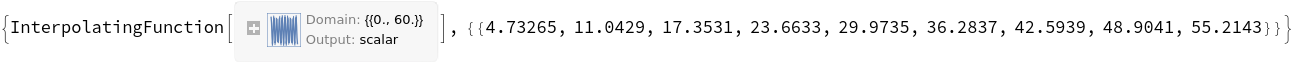

In [16]:
Reap[parametricNumericSolutionPlusPeriod[\[Pi]/12, 1, 1]]
Mean[Differences[First[Last[%]]]]

Let's make a function to extract the periods:

In [18]:
extractPeriod[\[Theta]0_, length_] := extractPeriod[\[Theta]0, length] = 
 Block[{crossings, g = 1},
   crossings =Reap[parametricNumericSolutionPlusPeriod[\[Theta]0, g, length]];
   Mean[Differences[First[Last[crossings]]]]]

**Coding comment:** We used the pattern `function[paramA_]: = function[paramA] =...`

This is called memoization and we will use this occasionally. Essentially, it stores the results of long computations, so we can re-use them!

To extract the pendulum length (i.e. the inverse problem), we'll interpolate the periods for various values of L and $\theta_0$ (we'll assume g=1)

In [19]:
periodsInterpolatingFunction = Interpolation[Flatten[
  Table[{{\[Theta]0, length},extractPeriod[\[Theta]0, length]}, 
    {\[Theta]0,Take[Subdivide[0, \[Pi]/2, 12], {2, -2}]},{length, Subdivide[0.1, 1.1, 12]}], 1]];

extractLengths[\[Theta]0_] := Table[length /. 
   First[FindRoot[60/periodsInterpolatingFunction[\[Theta]0, length] == 10 + i,
     {length, simplePendulumLength[1., {15, 10, 25}][i], 0.1,1.1}]], {i, 15}]

Finally, we can show the full result of our exploration!

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-   -Graphics-
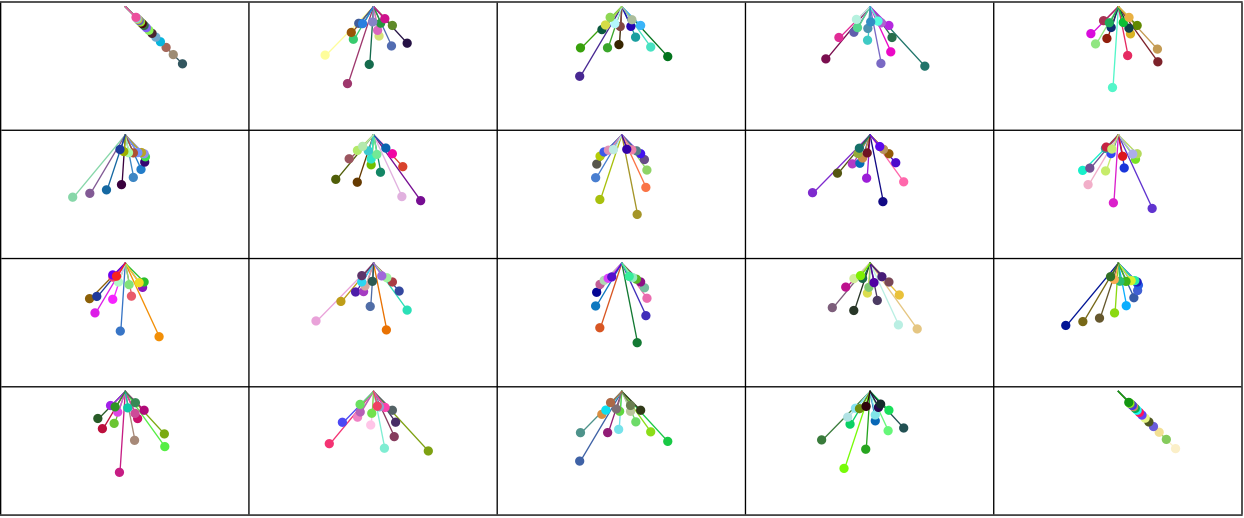

In [21]:
With[{g = 1, \[Theta]0 = \[Pi]/4,lengths = extractLengths[\[Pi]/4]}, 
 Multicolumn[Table[Show[
    Table[visualizePendulum[length,RandomColor[]][parametricNumericSolution[\[Theta]0, g, length][t]],
    {length, lengths}]], {t, Subdivide[0, 60, 19]}], 5, Appearance -> Horizontal,Frame -> All]]